# Observations and Insights



1) Ramicane and Capomulin were successful at reducing tumor volume. They reduced average tumor volume by roughly 11%-12%, while other treatments increased average tumor volume by roughly 16%-22% after 45 days of treatment.

2) Correlation between mouse weight and average tumor volume is positive for the Capomulin treatment, r= 0.84, p = < 0.001.

3) Highest mouse survival rate yielded by Capomulin, about 84%, while Propriva yielded only 28% based on the number of mice on day 1 versus day 45 of the treatment duration.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID") 
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Calculate mean of tumor volume by drug regimen
mean = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

# Calculate median of tumor volume by drug regimen
median = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

# Calculate variance of tumor volume by drug regimen
variance = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

# Calculate standard deviation of tumor volume by drug regimen
stdev = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

# Calculate SEM of tumor volume by drug regimen
sem = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

In [3]:
# Create a statistic summary table
statistic_summary = pd.DataFrame({"Mean of Tumor Volume (mm3)" : mean,
                                  "Median of Tumor Volume (mm3)" : median,
                                  "Variance of Tumor Volume (mm3)" : variance,
                                  "Standard Deviation of Tumor Volume (mm3)" : stdev,
                                  "SEM of Tumor Volume (mm3)" : sem})

statistic_summary

,Mean of Tumor Volume (mm3),Median of Tumor Volume (mm3),Variance of Tumor Volume (mm3),Standard Deviation of Tumor Volume (mm3),SEM of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [4]:
# Retrive number of mouse used for each drug regimen
mouse_count_regimen = combined_df.groupby("Drug Regimen")["Mouse ID"].nunique()
mouse_count_regimen

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64


## Bar plots

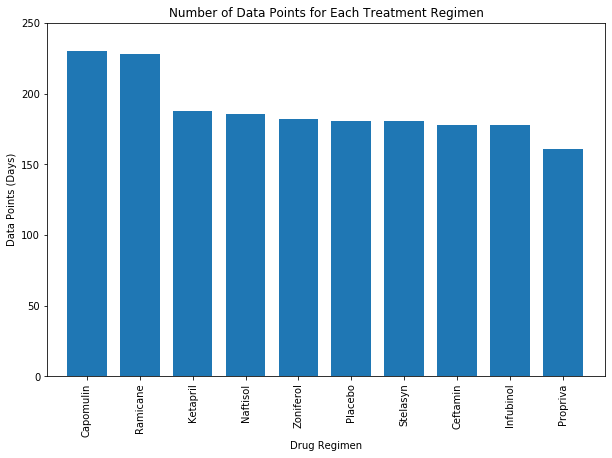

In [5]:
# Retrive data point value for each drug regimen
data_point = combined_df["Drug Regimen"].value_counts()

# Create a bar plot using pandas
pandas_plot = data_point.plot(kind = "bar", title = "Number of Data Points for Each Treatment Regimen",
                                     figsize= (10,6.5), width = 0.75, align = "center")

# Set x-axis label
pandas_plot.set_xlabel("Drug Regimen")

# Set y-axis label
pandas_plot.set_ylabel("Data Points (Days)")

# Set x limit and y limit
pandas_plot.set_xlim(-0.75, len(data_point)-0.2)
pandas_plot.set_ylim(0, max(data_point) + 20)

# Show the bar chart
plt.show()

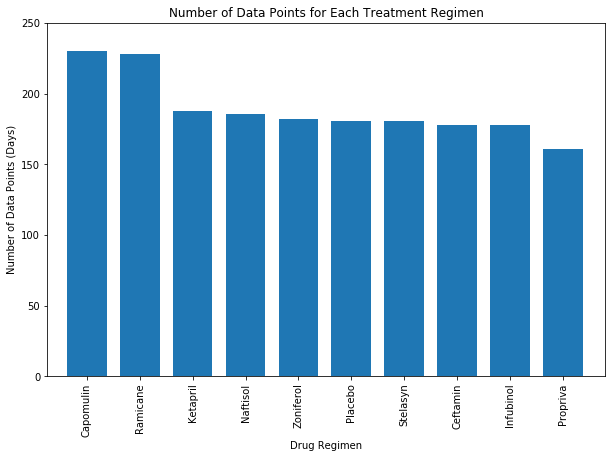

In [6]:
# Retrive index from data_point value counts to use for x axis
x_axis = data_point.index.tolist()

# Change the figure size
plt.figure(figsize=(10,6.5))

# Create a bar plot using matplotlib
plt.bar(x_axis, data_point, width = 0.75, align = "center")

# # Change x axis rotation to vertical
plt.xticks(rotation = "vertical")

# Add x axis label
plt.xlabel("Drug Regimen")

# Add y axis label
plt.ylabel("Number of Data Points (Days)")

# Add title
plt.title("Number of Data Points for Each Treatment Regimen")

# Set x limit and y limit
plt.xlim(-0.75, len(x_axis)-0.2)
plt.ylim(0, max(data_point) + 20)

# Show the plot
plt.show()


## Pie plots

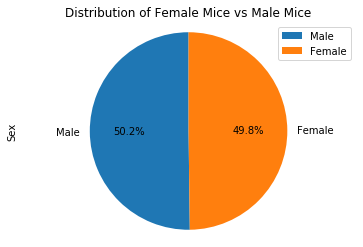

In [7]:
# Drop duplicates of mice id to get unique data
gender_mice = combined_df.drop_duplicates("Mouse ID")

# Get number counts for male and female mice
gender_mice = gender_mice["Sex"].value_counts()

# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_mice.plot(kind="pie", autopct = "%1.1f%%", startangle = 90, title = "Distribution of Female Mice vs Male Mice")

# Set the pie figure to equal
plt.axis("equal")

# Set the legend
plt.legend(loc = "upper right")

# Show the plot
plt.show()

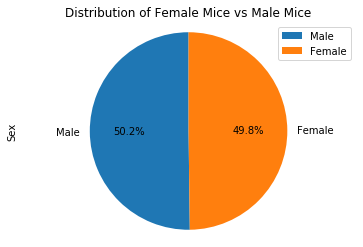

In [8]:
# Set data labels
labels = ["Male", "Female"]

# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_mice, labels = labels, autopct = "%1.1f%%", startangle = 90)

# Set the title
plt.title("Distribution of Female Mice vs Male Mice")

# Set the y axis label
plt.ylabel("Sex")

# Set the pie figure to equal
plt.axis("equal")

# Set the legend
plt.legend(loc = "upper right")

# Show the plot
plt.show()

## Quartiles, outliers and boxplots

In [9]:
# Retreive the last time point for each mouse
last_tumor_volume = combined_df.loc[combined_df.groupby("Mouse ID")["Timepoint"].idxmax()]
last_tumor_volume.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
483,a262,Placebo,Female,17,29,45,70.717621,4
493,a275,Ceftamin,Female,20,28,45,62.999356,3
500,a366,Stelasyn,Female,16,29,30,63.440686,1


In [10]:
# Retrieve data of each mouse across four of the most promising treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin. 
four_regimen = last_tumor_volume.loc[(last_tumor_volume["Drug Regimen"] == "Capomulin") |
                                     (last_tumor_volume["Drug Regimen"] == "Ramicane") |
                                     (last_tumor_volume["Drug Regimen"] == "Infubinol") |
                                     (last_tumor_volume["Drug Regimen"] == "Ceftamin")]

# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
regimen_summary = four_regimen[["Drug Regimen", "Mouse ID","Tumor Volume (mm3)"]].set_index(["Drug Regimen", "Mouse ID"]).sort_values("Drug Regimen")
regimen_summary

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    l897               38.846876
             j119               38.125164
             j246               38.753265
             u364               31.023923
             g316               40.159220
...                                   ...
Ramicane     j913               31.560470
             j989               36.134852
             k403               22.050126
             m546               30.564625
             g791               29.128472

[100 rows x 1 columns]

In [11]:
# Retrive four drug regimens
regimen_name = four_regimen["Drug Regimen"].unique()
regimen_name

array(['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin'], dtype=object)

In [12]:
# Create emplty list to hold the result after the loop
upperq_list = []
lowerq_list = []
median_list = []
iqr_list = []
lower_bound_list = []
upper_bound_list = []
outliers_list = []

# For each regimen, calculate quartiles, upper/lower quartile, mean, IQR and lower/upper bound
for regimen in regimen_name:
    outliers_count = 0
    quartiles = four_regimen["Tumor Volume (mm3)"].loc[four_regimen["Drug Regimen"] == regimen].quantile([0.25, 0.5, 0.75])
    upperq = round(quartiles[0.75],2)
    lowerq = round(quartiles[0.25],2)
    median = round(quartiles[0.5],2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5 * iqr),2)
    upper_bound = round(upperq + (1.5 * iqr),2)
    
    # Add each result to the list
    upperq_list.append(upperq)
    lowerq_list.append(lowerq)
    median_list.append(median)
    iqr_list.append(iqr)
    lower_bound_list.append(lower_bound)
    upper_bound_list.append(upper_bound)
    
    # For each data(volume), check if it is an outlier. If is it an outlier, increase the count by 1.
    for volume in (four_regimen["Tumor Volume (mm3)"].loc[(four_regimen["Drug Regimen"] == regimen)]):
        if (volume > upper_bound) | (volume < lower_bound):
            outliers_count = outliers_count + 1
    
    # Put outliers count to the list. Put 0 if there isn't any
    outliers_list.append(outliers_count)

# Create a summary dataframe for each regimen   
regimen_summary = pd.DataFrame({"Regimen" : regimen_name,
                   "Lower Quartile of Tumor Volume (mm3)" : lowerq_list,
                   "Upper Quartile of Tumor Volume (mm3)" : upperq_list,
                   "Median of Tumor Volume (mm3)" : median_list,
                   "IQR of Tumor Volume (mm3)" : iqr_list,
                   "Lower Bound of Tumor Volume (mm3)" : lower_bound_list,
                   "Upper Bound of Tumor Volume (mm3)" : upper_bound_list,
                   "Number of Outliers" : outliers_list,            
                    })   
# Show the summary
regimen_summary 

,Regimen,Lower Quartile of Tumor Volume (mm3),Upper Quartile of Tumor Volume (mm3),Median of Tumor Volume (mm3),IQR of Tumor Volume (mm3),Lower Bound of Tumor Volume (mm3),Upper Bound of Tumor Volume (mm3),Number of Outliers
0,Infubinol,54.05,65.53,60.17,11.48,36.83,82.75,1
1,Ceftamin,48.72,64.30,59.85,15.58,25.35,87.67,0
2,Ramicane,31.56,40.66,36.56,9.10,17.91,54.31,0
3,Capomulin,32.38,40.16,38.13,7.78,20.71,51.83,0


In [13]:
# Retrive the last tumor volume for each drug regimen
capomulin_volume =  last_tumor_volume.loc[(last_tumor_volume["Drug Regimen"] == "Capomulin")]
ramicane_volume = last_tumor_volume.loc[(last_tumor_volume["Drug Regimen"] == "Ramicane")]
infubinol_volume = last_tumor_volume.loc[(last_tumor_volume["Drug Regimen"] == "Infubinol")]
ceftamin_volume = last_tumor_volume.loc[(last_tumor_volume["Drug Regimen"] == "Ceftamin")]

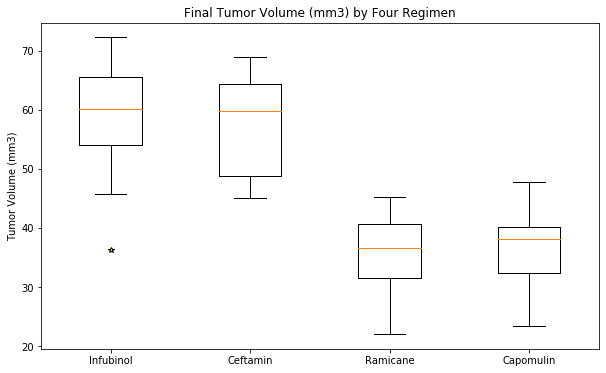

In [14]:
# Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens
data = [infubinol_volume["Tumor Volume (mm3)"],ceftamin_volume["Tumor Volume (mm3)"], 
        ramicane_volume["Tumor Volume (mm3)"],capomulin_volume["Tumor Volume (mm3)"]]

# Highlight any potential outliers in the plot by changing their color and style.
yellow_star = dict(markerfacecolor = 'yellow', marker = '*')

# Create a subplot
fig1, ax1 = plt.subplots(figsize=(10,6))

# Set title
ax1.set_title('Final Tumor Volume (mm3) by Four Regimen')

# Set ylabel
ax1.set_ylabel("Tumor Volume (mm3)")

# Create a boxplot
ax1.boxplot(data, flierprops = yellow_star)

# Change the x ticks to regimen name
plt.xticks([1,2,3,4], regimen_name)

# Show the plot
plt.show()

## Line and scatter plots

Text(0, 0.5, 'Tumor Volume (mm3)')

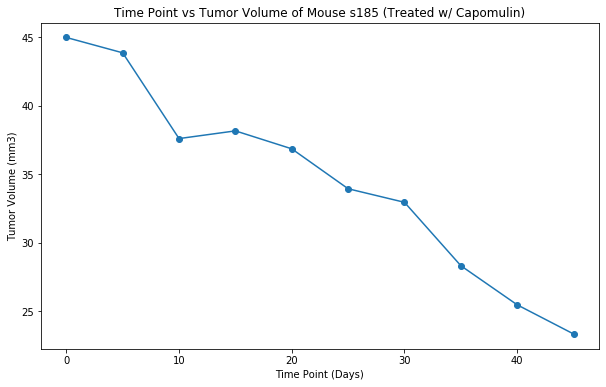

In [15]:
# Retrive data only for Capomulin
capomulin_data = combined_df.loc[(combined_df["Drug Regimen"] == "Capomulin")]

# Pick a single mouse. In this case, mouse id s195 is picked
s185 = capomulin_data.loc[capomulin_data["Mouse ID"] == "s185"]

# Change the figure size
plt.figure(figsize=(10,6))

# Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin
plt.plot(s185["Timepoint"], s185["Tumor Volume (mm3)"], marker = "o")

# Set title
plt.title("Time Point vs Tumor Volume of Mouse s185 (Treated w/ Capomulin)")

# Set xlabel
plt.xlabel("Time Point (Days)")

# Set ylabel
plt.ylabel("Tumor Volume (mm3)")

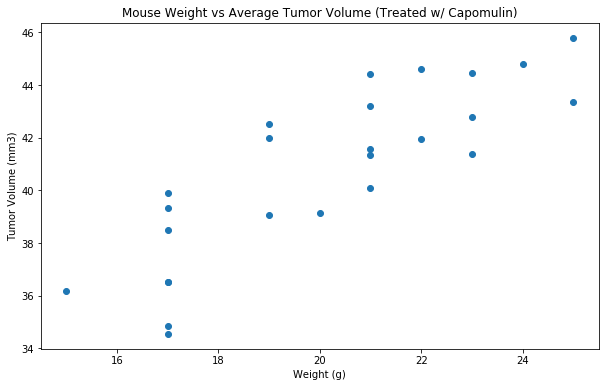

In [16]:
# Calculate average data for each mouse that was treated w/ Capomulin
avg_mouse = capomulin_data.groupby("Mouse ID").mean()

# Retrive tumor volume for each mouse
avg_volume = avg_mouse["Tumor Volume (mm3)"]

# Retrive average weight for each mouse
avg_weight = avg_mouse["Weight (g)"]

# Change the figure size
plt.figure(figsize=(10,6))

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
plt.scatter(avg_weight, avg_volume)

# Set title
plt.title("Mouse Weight vs Average Tumor Volume (Treated w/ Capomulin)")

# Set xlabel
plt.xlabel("Weight (g)")

# Set ylabel
plt.ylabel("Tumor Volume (mm3)")

# Show the plot
plt.show()

The correlation coefficient between mouse weight and average tumor volume for the Capomulin treatment is 0.84


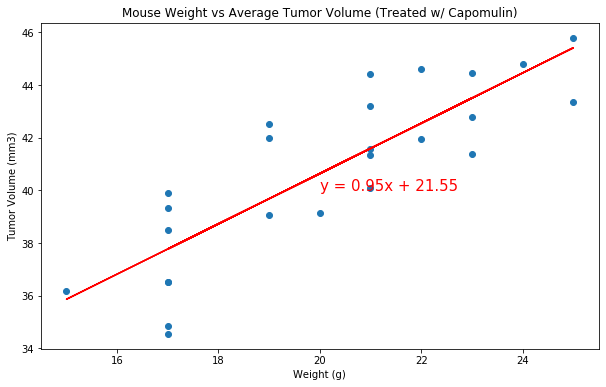

In [17]:
# Calculate the correlation coefficient between mouse weight and average tumor volume for the Capomulin treatment
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin treatment is \
{round(st.pearsonr(avg_weight, avg_volume)[0],2)}")

# Calculate the linear regression model between mouse weight and average tumor volume 
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_weight, avg_volume)

# Set y = mx + b
regress_values = avg_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Change the figure size
plt.figure(figsize=(10,6))

# Create a scatter plot using average tumor volume and weight
plt.scatter(avg_weight, avg_volume)

# Set a title
plt.title("Mouse Weight vs Average Tumor Volume (Treated w/ Capomulin)")

# Set xlabel
plt.xlabel("Weight (g)")

# Set ylabel
plt.ylabel("Tumor Volume (mm3)")

# Set the regression line
plt.plot(avg_weight,regress_values,"r-")

# Set the regression line label
plt.annotate(line_eq,(20,40),fontsize=15,color="red")

# Show the plot
plt.show()


In [18]:
print(st.pearsonr(avg_weight, avg_volume))

(0.8419363424694717, 1.322572243471279e-07)


In [19]:
# To calculate survival rate, retrive number of mouse that has timepoint of 45(last date)
last_mouse_count = combined_df.loc[combined_df["Timepoint"] == 45]
last_mouse_count = last_mouse_count.groupby("Drug Regimen")["Mouse ID"].nunique()

# Devide by mouse count at the beginning of treatment
survival_rate = round((last_mouse_count / mouse_count_regimen) * 100,2)

print("In the beginning of the treatment, mouse count for each regimen was: ")
print(mouse_count_regimen)
print("")

print("At the end of the treatment, mouse count for each regimen was: ")
print(last_mouse_count)
print("")

print("For the above result, mouse survival rate(%) for each regimen was: ")
print(survival_rate)

In the beginning of the treatment, mouse count for each regimen was: 
Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

At the end of the treatment, mouse count for each regimen was: 
Drug Regimen
Capomulin    21
Ceftamin     13
Infubinol     9
Ketapril     11
Naftisol     13
Placebo      11
Propriva      7
Ramicane     20
Stelasyn     11
Zoniferol    14
Name: Mouse ID, dtype: int64

For the above result, mouse survival rate(%) for each regimen was: 
Drug Regimen
Capomulin    84.00
Ceftamin     52.00
Infubinol    36.00
Ketapril     44.00
Naftisol     52.00
Placebo      44.00
Propriva     28.00
Ramicane     80.00
Stelasyn     45.83
Zoniferol    56.00
Name: Mouse ID, dtype: float64
